In [172]:
import numpy as np
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import math
import statistics 
import matplotlib.pyplot as plt

In [181]:
def centroidFind(arr,clusters,seed = 2):
    rand = np.random.RandomState(seed)
    arr= np.array(arr)
    i = rand.permutation(arr.shape[0])[:clusters]
    return arr,arr[i]
    

In [182]:
def clustFind(arr, n_clusters):

    arr,centers = centroidFind(arr,n_clusters)
    while True:
        temp=[]
        dist=distance.cdist(arr, centers, 'cosine')
        for i in dist:
            temp.append(np.where(i==i.min())[0][0])
        labels=np.asarray(temp)
        
        temp = []
        for j in range(n_clusters):
            temp.append(arr[labels == j].mean(0)) 
            new_centers = np.array(temp)
            
        
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return labels


In [183]:
def getData(filename):
    arr=[]    
    for line in open(filename):
        arr.append(line[:-1].split(' '))
    return arr



In [204]:
def KMeans_SSE(np_data_set, K):

    centroids = np_data_set[np.random.choice(np_data_set.shape[
    0], size=K, replace=False), :]

    instanceNum = 150
    iterationNum = 300
    attributeNum = 2
    class_column = attributeNum - 1
    clusterAssign = np.empty(instanceNum)
    centroids_ = False
    sum=0.0
    count=0  
    sse = 0.0
    
     
   

    while max_iterations > 0 and not(centroids_):
        for row in range(0, instanceNum):
     
            this_instance = np_data_set[row]
            distanceMin = float("inf")
        
            temp=[]
            dist=distance.cdist(np_data_set, centroids, 'cosine')
            for i in dist:
                temp.append(np.where(i==i.min())[0][0])
            clusterAssign=np.asarray(temp)

        centroidOld = centroids.copy()
 
        for centroidRow in range(0, K):
 
            for centroidCol in range(0, attributeNum):

                running_sum = 0.0
                count = 0.0
                average = None
 
                for row in range(0, instanceNum):

                     if(row_centroid == cluster_assignments[row]):
                 
                        running_sum += np_data_set[row,centroidCol]
                        count += 1
         
                        if (count > 0):
                            average = running_sum / count
                centroids[centroidRow,centroidCol] = average
        
   
        centroids_= np.array_equal(centroidOld,centroids)
 
        if centroids_:
            print("Done")

        max_iterations -= 1
    
 
    for centroid_index in range(0, K):
        sum=0.0
        count=0 
        sse = 0.0
        for row in range(0, instanceNum):  
            if(centroid_index==cluster_assignments[row]):
                sum=sum+(np.linalg.norm(np_data_set[row] - centroids[centroid_index])*np.linalg.norm(np_data_set[row] - centroids[centroid_index]))
                sse=sse+sum
    
    return(sse)


In [185]:
data = []
for elem in open(r'test1.txt'):
    data.append(elem[:-1].split(' '))
    
data = np.array(data).astype(np.float)

data, centers  = centroidFind(data,3)


In [186]:
sse =[]
for K in range (1,10,1):
    sse.append(K_means_SSE(data, K))
    
sse
    

1
1
1
Cluster membership is unchanged. Stopping criteria has been met.
2
2
2
2
Cluster membership is unchanged. Stopping criteria has been met.
3
3
3
3
3
3
3
3
3
Cluster membership is unchanged. Stopping criteria has been met.
4
4
4
4
4
4
Cluster membership is unchanged. Stopping criteria has been met.
5
5
5
5
5
5
Cluster membership is unchanged. Stopping criteria has been met.
6
6
6
6
6
Cluster membership is unchanged. Stopping criteria has been met.
7
7
7
7
7
7
7
7
Cluster membership is unchanged. Stopping criteria has been met.
8
8
8
8
8
8
8
Cluster membership is unchanged. Stopping criteria has been met.
9
9
9
9
9
9
9
Cluster membership is unchanged. Stopping criteria has been met.


[82525.20260000003,
 48639.642792792794,
 104.7082142857142,
 101.76375,
 476.52459999999945,
 19.259285714285706,
 112.00375000000007,
 406.07804878048785,
 269.2172500000001]

In [187]:
centers

array([[7.7, 3.8, 6.7, 2.2],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 2.8, 4.6, 1.5]])

In [208]:
a_list = list(range(1, 10))

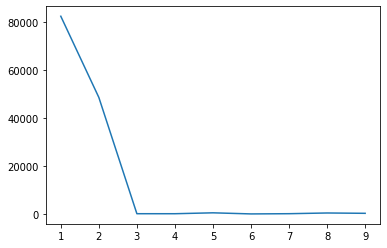

In [209]:
plt.plot(a_list, sse)
plt.show()

In [189]:
labels=clustFind(data,3)

In [190]:
labels

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2])

In [200]:
f=open("Resultiris.txt","w")

for t in labels:
    f.write(str(t+1))
    f.write("\n")

f.close()

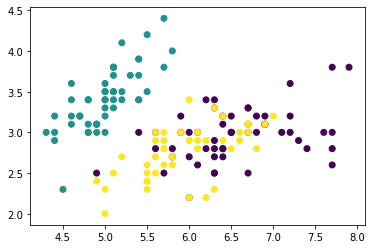

In [201]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c = labels)
plt.show()


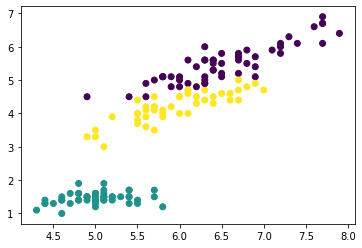

In [202]:
plt.scatter(data[:, 0], data[:, 2], c = labels)
plt.show()




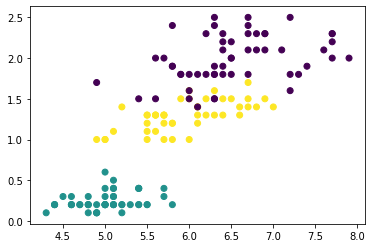

In [194]:
plt.scatter(data[:, 0], data[:, 3], c = labels)
plt.show()


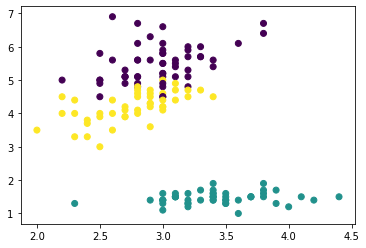

In [195]:
plt.scatter(data[:, 1], data[:, 2], c = labels)
plt.show()


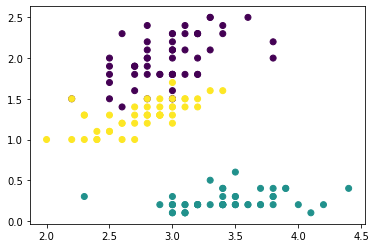

In [196]:
plt.scatter(data[:, 1], data[:, 3], c = labels)
plt.show()
